In [3]:
"""from PIL import Image

# Load the image
img = Image.open(r'C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\Fundus_Train_Val_Data\Fundus_Scanes_Sorted\Train\Glaucoma_Positive\036.jpg')

# Get the size of the image
width, height = img.size

# Load the pixel values into a 2D array
pixel_array = []
for y in range(height):
    row = []
    for x in range(width):
        # Get the pixel value at (x,y)
        pixel = img.getpixel((x, y))
        row.append(pixel)
    pixel_array.append(row)"""

In [8]:
#print(y)

2047


In [45]:
import os
import glob
import numpy as np
from PIL import Image

# Set path to image folder
image_folder_path = r'C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\ORIGA\ORIGA\Flatten images'

# Create flattened directory
flattened_folder_path = os.path.join(image_folder_path, 'flattened')
os.makedirs(flattened_folder_path, exist_ok=True)

# Get list of all image files in folder
image_files = glob.glob(os.path.join(image_folder_path, '*.jpg'))

# Loop over image files
for image_file in image_files:
    # Load image
    image = Image.open(image_file)
    grayscale_image = image.convert('L')

    # Convert to numpy array
    image_array = np.array(grayscale_image)

    # Flatten array
    flattened_array = image_array.reshape(-1)

    # Convert back to image
    flattened_image = Image.fromarray(flattened_array.reshape(image_array.shape[:2]))

    # Save flattened image
    flattened_image.save(os.path.join(flattened_folder_path, os.path.basename(image_file)))



In [48]:
"""import os
import glob
import numpy as np
from PIL import Image
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 


# Load the dataset


# Set path to image folder
image_folder_path = r'C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\ORIGA\ORIGA\Flatten images'

# Create flattened directory
flattened_folder_path = os.path.join(image_folder_path, 'flattened')
os.makedirs(flattened_folder_path, exist_ok=True)

# Get list of all image files in folder
image_files = glob.glob(os.path.join(flattened_folder_path, '*.jpg'))

# Load flattened images into an array
data = []
image_shape = None
for image_file in image_files:
    image = Image.open(image_file)
    flattened_array = np.array(image).reshape(-1)
    if image_shape is None:
        # Store the shape of the first image array
        image_shape = flattened_array.shape
    else:
        # Check if the shape of the current array is the same as the first array
        if flattened_array.shape != image_shape:
            raise ValueError('All flattened image arrays must have the same shape')
    data.append(flattened_array)
    print(f"Image shape: {flattened_array.shape}")

# Create labels
unique_labels = np.unique([0 if 'normal' in os.path.basename(file) else 1 for file in image_files])
if len(unique_labels) == 1:
    # If there is only one unique label, assign the other label to the remaining data
    labels = np.array([0 if 'normal' in os.path.basename(file) else 1 for file in image_files])
    labels[0] = 1 - labels[0]
else:
    # If there are two unique labels, use them as-is
    labels = np.array(unique_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Train SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Test SVM model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

y_pred = clf.predict(X_test)


# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for SVM is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)
print(labels)"""

Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (62

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\glaucoma copy.csv')
print(df)
print (df.dtypes)
df = df.drop(labels=[359], axis=0)

    Filename  ExpCDR Eye Set  Glaucoma
0    001.jpg  0.7097  OD   A         0
1    002.jpg  0.6953  OS   A         0
2    003.jpg  0.9629  OS   A         0
3    004.jpg  0.7246  OD   A         0
4    005.jpg  0.6138  OS   A         0
..       ...     ...  ..  ..       ...
645  646.jpg  0.6560  OD   A         1
646  647.jpg  0.7365  OD   A         1
647  648.jpg  0.5101  OS   A         1
648  649.jpg  0.5227  OD   B         0
649  650.jpg  0.6195  OS   B         1

[650 rows x 5 columns]
Filename     object
ExpCDR      float64
Eye          object
Set          object
Glaucoma      int64
dtype: object


In [59]:
"""import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
from sklearn import svm
from sklearn.model_selection import train_test_split

# Set path to image folder
image_folder_path = r'C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\ORIGA\ORIGA\Flatten images\flattened'

# Create flattened directory
flattened_folder_path = os.path.join(image_folder_path, 'flattened')
os.makedirs(flattened_folder_path, exist_ok=True)

# Get list of all image files in folder
image_files = glob.glob(os.path.join(image_folder_path, '*.jpg'))

# Load flattened images into an array
data = []
image_shape = None
for image_file in image_files:
    image = Image.open(image_file)
    flattened_array = np.array(image).reshape(-1)
    if image_shape is None:
        # Store the shape of the first image array
        image_shape = flattened_array.shape
    else:
        # Check if the shape of the current array is the same as the first array
        if flattened_array.shape != image_shape:
            raise ValueError('All flattened image arrays must have the same shape')
    data.append(flattened_array)
    print(f"Image shape: {flattened_array.shape}")

# Load spreadsheet data and map to image filenames
image_labels = df["Glaucoma"]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, image_labels, test_size=0.2, random_state=42)

# Train SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Test SVM model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")"""


Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (6291456,)
Image shape: (62

MemoryError: Unable to allocate 24.3 GiB for an array with shape (519, 6291456) and data type float64

In [12]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle

# Set path to image folder
image_folder_path = r'C:\Users\johns\OneDrive\University work\Final Year\Final Year Project\Datasets\archive (1)\ORIGA\ORIGA\Flatten images\flattened'

# Create flattened directory
##flattened_folder_path = os.path.join(image_folder_path, 'flattened')
##os.makedirs(flattened_folder_path, exist_ok=True)

# Get list of all image files in folder
image_files = glob.glob(os.path.join(image_folder_path, '*.jpg'))

# Define image size
image_size = (1920, 1080)

# Load flattened images into an array
data = []
for image_file in image_files:
    # Load image and resize
    image = Image.open(image_file).resize(image_size)
    flattened_array = np.array(image).reshape(-1)
    data.append(flattened_array)
    #print(f"Image shape: {flattened_array.shape}")

# Load spreadsheet data and map to image filenames
image_labels = df["Glaucoma"]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, image_labels, test_size=0.3, random_state=42)

# Train SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

#scores = cross_val_score(clf, X_train, y_train, cv=5)
#print(scores)


# Test SVM model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

filename = '1920x1080_SVM_model.sav'
pickle.dump(clf, open(filename, 'wb'))

Accuracy: 0.7025641025641025


In [13]:
predictions = clf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(image_labels, clf.predict(data))

predictions = clf.predict(data)

TN, FP, FN, TP = confusion_matrix(image_labels, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  136
False Positive(FP) =  26
True Negative(TN)  =  455
False Negative(FN) =  32


In [15]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.911


In [16]:
clf = {}

from sklearn.svm import LinearSVC
clf['Support Vector Machines'] = LinearSVC()

from sklearn.tree import DecisionTreeClassifier
clf['Decision Trees'] = DecisionTreeClassifier()


from sklearn.ensemble import RandomForestClassifier
clf['Random Forest'] = RandomForestClassifier()


from sklearn.naive_bayes import GaussianNB
clf['Naive Bayes'] = GaussianNB()

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in clf.keys():
    
    # Fit the classifier
    clf[key].fit(data, image_labels)
    # Make predictions
    predictions = clf[key].predict(data)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, image_labels)
    precision[key] = precision_score(predictions, image_labels)
    recall[key] = recall_score(predictions, image_labels)

c:\Users\johns\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [9]:
"""from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

accuracy, precision, recall = {}, {}, {}

for key in clf.keys():
    
    # Fit the classifier
    clf[key].fit(data, image_labels)
    # Make predictions
    predictions = clf[key].predict(data)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions.astype(np.int32), image_labels.astype(np.int32))
    precision[key] = precision_score(predictions.astype(np.int32), image_labels.astype(np.int32))
    recall[key] = recall_score(predictions.astype(np.int32), image_labels.astype(np.int32))"""


OverflowError: Python int too large to convert to C long

In [10]:
"""from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in clf.keys():
    
    # Fit the classifier
    clf[key].fit(data, image_labels)
    # Make predictions
    predictions = clf[key].predict(data)
    
    # Calculate metrics
    accuracy[str(key)] = accuracy_score(predictions, image_labels)
    precision[str(key)] = precision_score(predictions, image_labels)
    recall[str(key)] = recall_score(predictions, image_labels)"""

MemoryError: Unable to allocate 30.4 GiB for an array with shape (649, 6287360) and data type float64

In [18]:
df_model = pd.DataFrame(index=clf.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Support Vector Machines,0.998459,0.994048,1.000000
Decision Trees,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000
Naive Bayes,0.590139,0.666667,0.347826


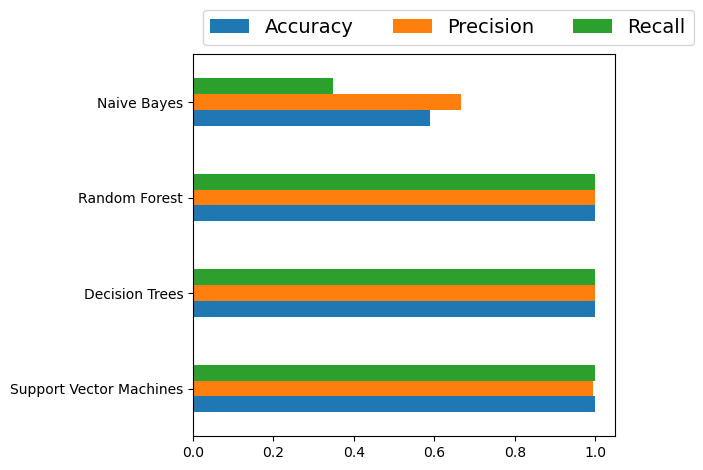

In [19]:
import matplotlib.pyplot as plt
ax = df_model.plot.barh()
ax.legend(
    ncol=len(clf.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)